# TP SEMANAL N°10

### Juan Ignacio Jimenez Copati

## *CONSIGNA*

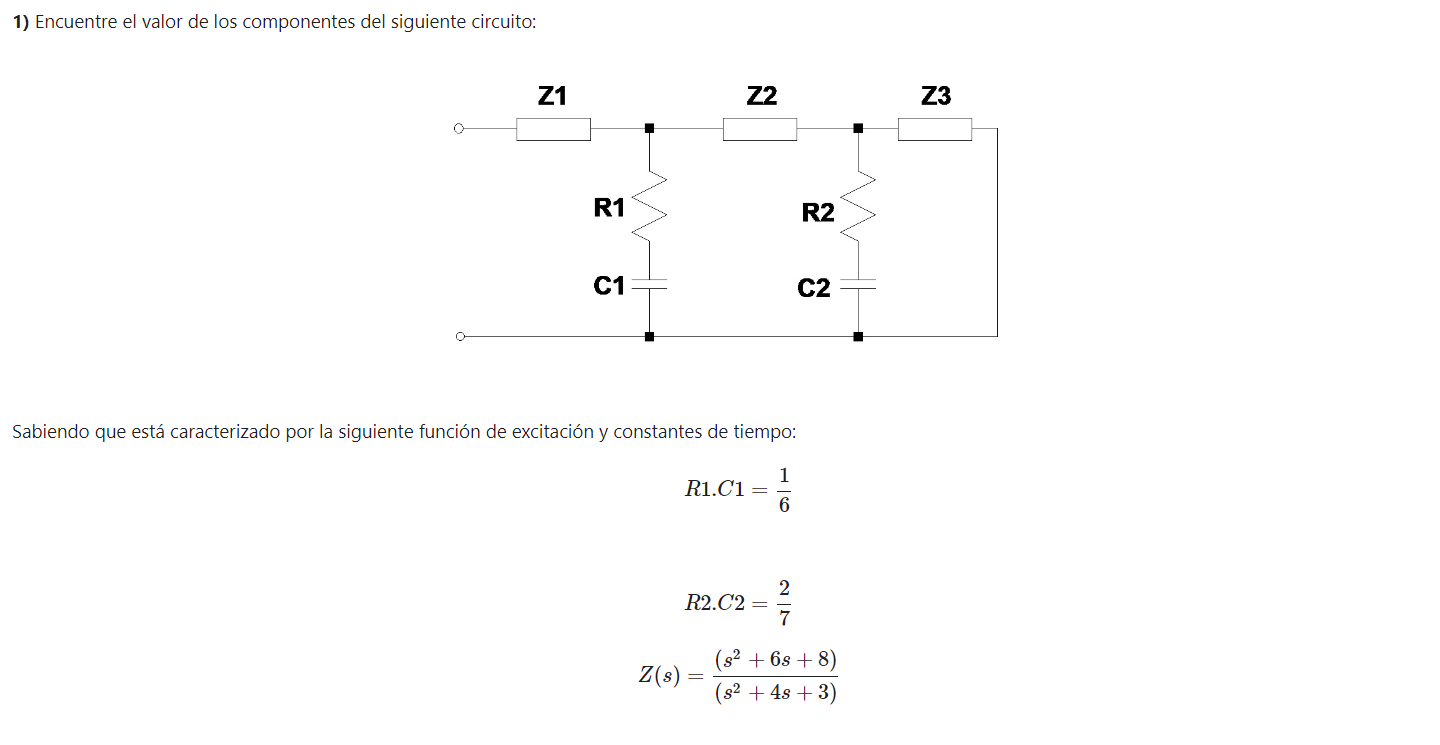

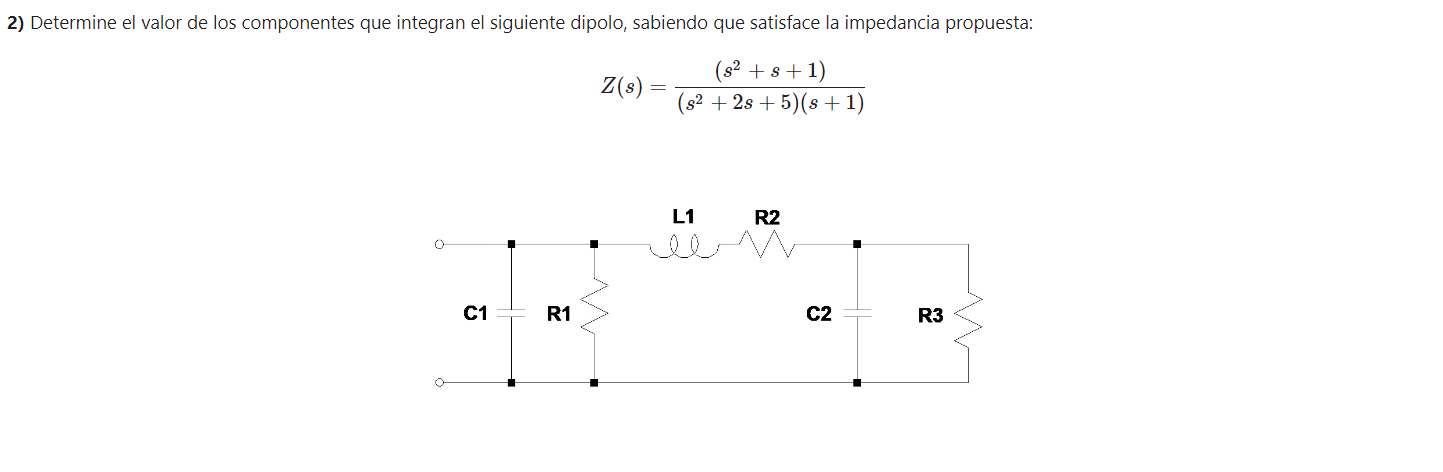

## *Desarrollo en papel*

In [1]:
from IPython.display import IFrame
IFrame("./ts10.pdf", width=960, height=1000)

## *Análisis numérico punto 1*

In [2]:
import sympy as sp
import numpy as np
# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_RC_derivacion, dibujar_tanque_RC_serie, dibujar_tanque_RC_derivacion,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

In [3]:
s = sp.symbols('s ', complex=True)

ZZ = (s**2 + 6*s + 8)/(1*s**2 + 4*s+ 3)

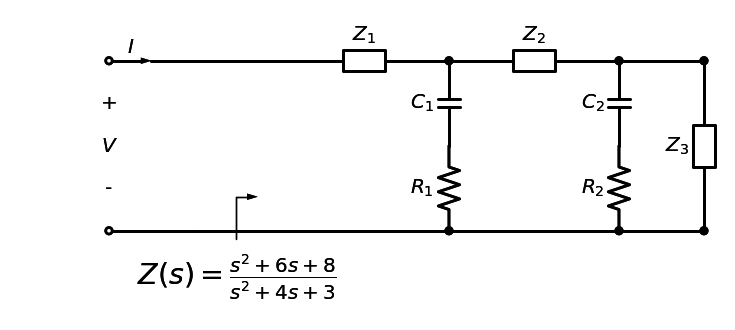

In [4]:
#Dibyjo el puerto
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
#Dibujo la func excitación
d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Z(s)',  
                 ZZ, 
                 hacia_salida = True,
                 k_gap_width = 0.5)
#
d = dibujar_elemento_serie(d,ResistorIEC,'Z_1')
d = dibujar_tanque_RC_derivacion(d,sym_R_label='R_1', capacitor_lbl='C_1')
d = dibujar_elemento_serie(d,ResistorIEC,'Z_2')
d = dibujar_tanque_RC_derivacion(d,sym_R_label='R_2', capacitor_lbl='C_2')
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d,ResistorIEC,'Z_3')
display(d)

In [5]:
#Muestro raíces de num y den

roots_num = np.roots([1, 6, 8])
print(roots_num)

roots_den = np.roots([1, 4, 3])
print(roots_den)

[-4. -2.]
[-3. -1.]


Remuevo parcialmente la k en infinito para generar un cero en $\sigma$=-6

In [6]:
from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

#Remuevo parcialmente el k_inf

ZZ_2, Z1 = remover_valor_en_infinito(ZZ,sigma_zero=-6)

ZZ_2_exp = sp.expand(ZZ_2)

ZZ_2_exp = sp.simplify(ZZ_2_exp)


print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_2', ZZ_2_exp)[1:-1],ZZ_2))

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('k_\infty','Z1')[1:-1],Z1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora invierto hacia admitancia para posteriormente retirar el primer tanque, obteniendo R1 y C1

In [7]:
YY_2 = 1/ZZ_2

YY_3, Z_RC1, R1, C1=remover_polo_sigma(YY_2,sigma = -6 , isImpedance = False, isRC = True )

YY_3_exp = sp.simplify(YY_3)

print_latex(a_equal_b_latex_s('Y_3',YY_3))

print_latex(a_equal_b_latex_s('Z_{RC1}',Z_RC1))

print_latex(a_equal_b_latex_s('R_1',R1))

print_latex(a_equal_b_latex_s('C_1',C1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Invirtiendo nuevamente mi funcion, la transformo en impedancia para sacar la Z2 del circuito. Esto se traduce en remover parcialmente la $k_\infty$ de forma que el cero que tenía en $\sigma=-\frac{16}{7}$ se mueva hasta $\sigma=-\frac{7}{2}$

In [8]:
ZZ_3 = 1/YY_3

ZZ_4, Z2 = remover_valor_en_infinito(ZZ_3,sigma_zero=-7/2)

ZZ_4_exp = sp.expand(ZZ_4)

ZZ_4_exp = sp.simplify(ZZ_4_exp)
ZZ_4_exp = sp.collect(ZZ_4,s)

print_latex(a_equal_b_latex_s('Z_4', ZZ_4_exp))

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('k_\infty','Z2')[1:-1],Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora invierto nuevamente para tener mi admitancia y poder así retirar el tanque RC2

In [9]:
YY_4 = 1/ZZ_4

YY_5, Z_RC2, R2, C2=remover_polo_sigma(YY_4,sigma = -3.5 , isImpedance = False, isRC = True )

YY_5_exp = sp.simplify(YY_5)

print_latex(a_equal_b_latex_s('Y_5',YY_5))

print_latex(a_equal_b_latex_s('Z_{RC2}',Z_RC2))

print_latex(a_equal_b_latex_s('R_2',R2))

print_latex(a_equal_b_latex_s('C_2',C2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Producto de un pequeño error decimal, la $Y_5$ da mal. Si se presta atención, puede verse que los términos entre paréntesis del numerador y denominador se cancelan, dejando:

In [10]:
YY_5 = 0.797619

Z3 = 1/YY_5

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_5','Z3')[1:-1], Z3))

<IPython.core.display.Math object>

Dejándonos la red de la siguiente manera:

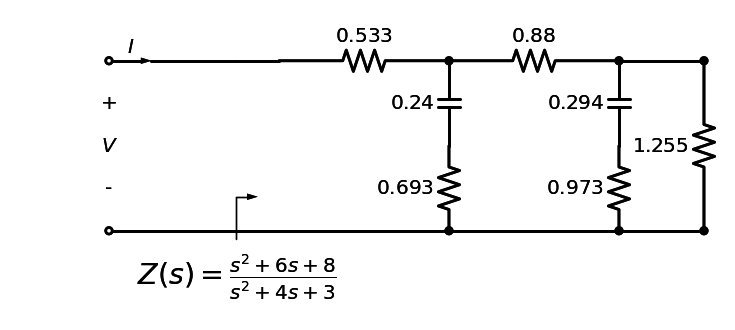

In [31]:
#Dibyjo el puerto
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
#Dibujo la func excitación
d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Z(s)',  
                 ZZ, 
                 hacia_salida = True,
                 k_gap_width = 0.5)
#Redondeo para que me entre en el gráfico
Z1=round(Z1,3)
Z2=round(Z2,3)
Z3=round(Z3,3)
R1=round(R1,3)
R2=round(R2,3)
C1=round(C1,3)
C2=round(C2,3)
#Dibujo la red
d = dibujar_elemento_serie(d,Resistor,Z1)
d = dibujar_tanque_RC_derivacion(d,sym_R_label=R1, capacitor_lbl=C1)
d = dibujar_elemento_serie(d,Resistor,Z2)
d = dibujar_tanque_RC_derivacion(d,sym_R_label=R2, capacitor_lbl=C2)
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d,Resistor,'1.255') #no sé por qué no me tomaba Z3
display(d)

## *Análisis circuital punto 2*

Para el punto 2 opté por simular la respuesta en frecuencia de la red resultante del desarrollo en papel. El análisis es el siguiente:  dado que es una red disipativa, las singularidades no están sobre el eje j$\omega$, por lo que hacer un barrido de frecuencia parece no ser una opción en primera instancia. Sin embargo, los polos y ceros aún se pueden apreciar en el gráfico de amplitud en funcion de la frecuencia. Partiendo de $\omega$=0 hasta $\omega=\infty$ nos desplazaremmos y, tal como se muestra en el siguiente gráfico, las singularidades pueden ser ubicadas fácilmente.

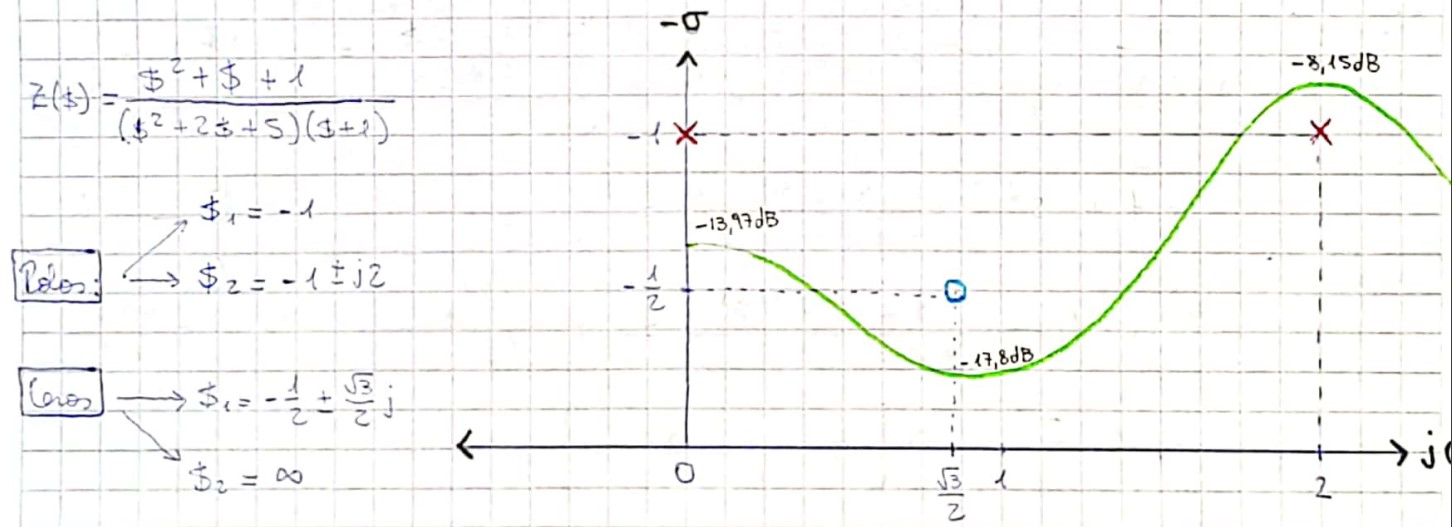

En la última hoja del desarrollo en papel se calcularon esos valores de magnitud. Solo queda comparar con la simulación.

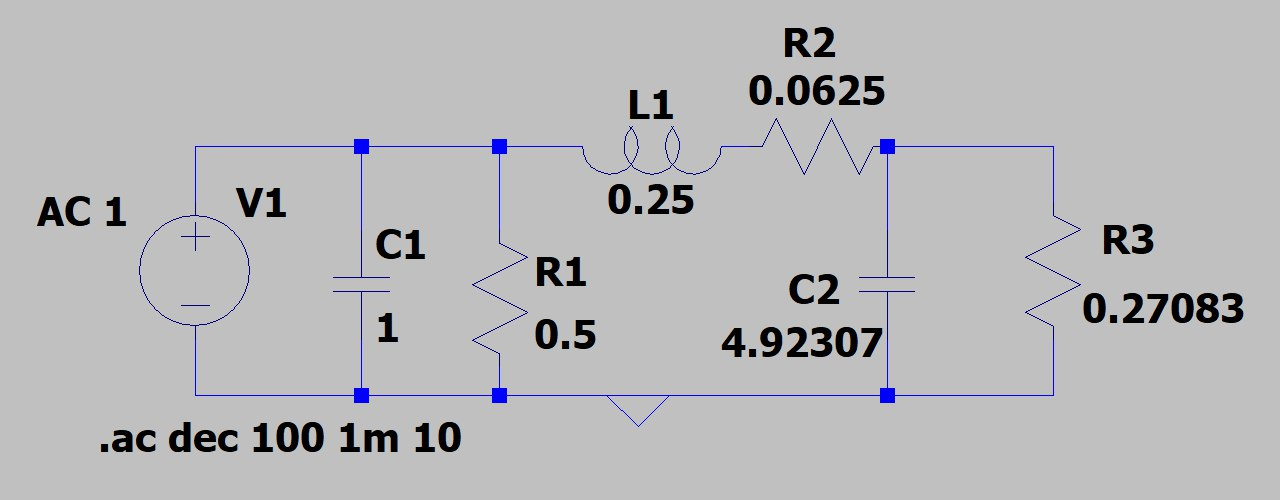

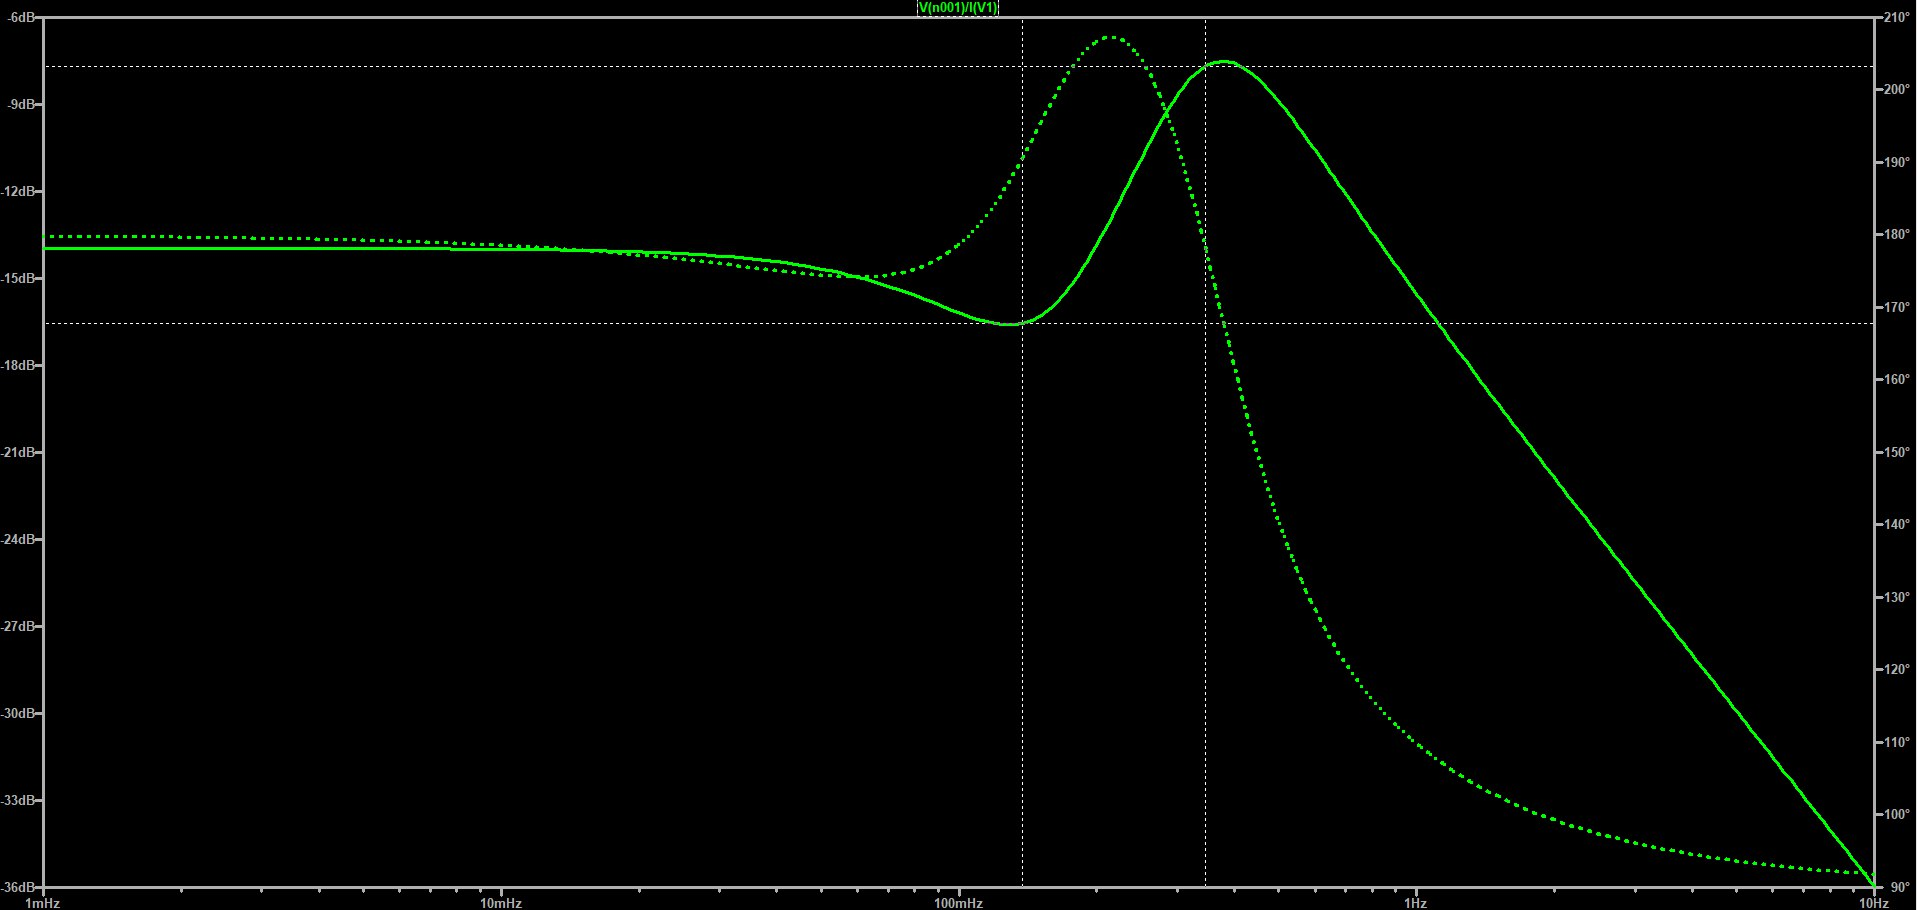

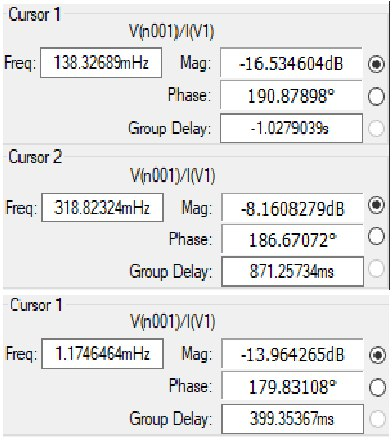

Los valores a las frecuencias requeridas dan aproximadamente igual. Se confirma el análisis.